<h1>Tp1</h1>

<h2>Coordenadas cromáticas</h2>

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [34]:
def imgToCromaticCoords(imgRGB):
    im_r, im_g, im_b = cv.split(imgRGB)
    img_suma_rgb = im_r.astype('uint16') + \
        im_g.astype('uint16') + im_b.astype('uint16')
    img_suma_rgb[img_suma_rgb == 0] = 1
    # Si la suma de todas las componentes es 0, entonces las tres componentes son 0. Para evitar dividir por cero,
    # forzamos un valor de 1 en esos valores
    chromatic_coords_image = cv.merge([im_r, im_g, im_b]/img_suma_rgb)
    return chromatic_coords_image


In [35]:
def showTwoImages(img1, img2):
    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(img1)
    axs[1].imshow(img2)


In [36]:
img1 = cv.cvtColor(
    cv.imread("coord_cromaticas/CoordCrom_1.png",), cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(
    cv.imread("coord_cromaticas/CoordCrom_2.png",), cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(
    cv.imread("coord_cromaticas/CoordCrom_3.png",), cv.COLOR_BGR2RGB)
img1_crom = imgToCromaticCoords(img1)
img2_crom = imgToCromaticCoords(img2)
img3_crom = imgToCromaticCoords(img3)


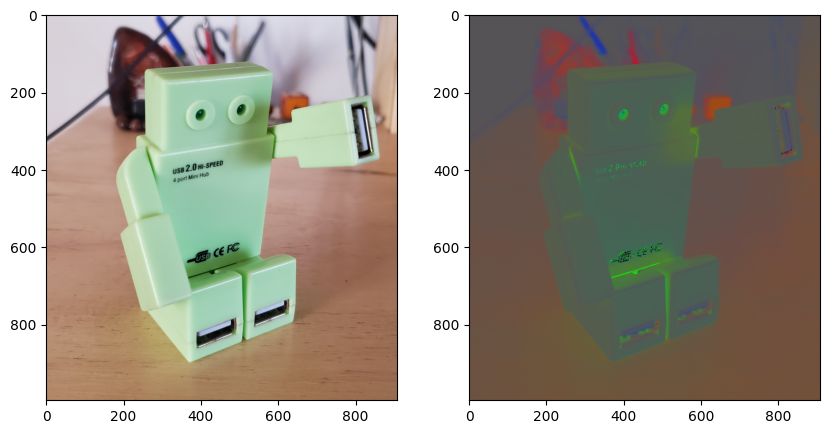

In [37]:
showTwoImages(img1, img1_crom)


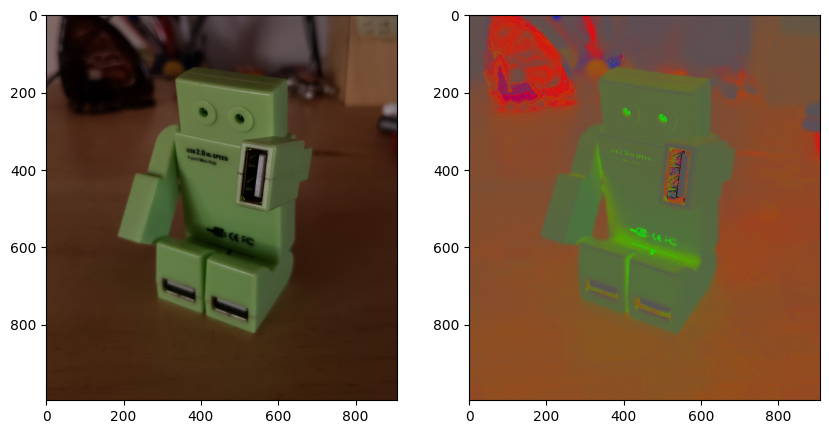

In [38]:
showTwoImages(img2, img2_crom)


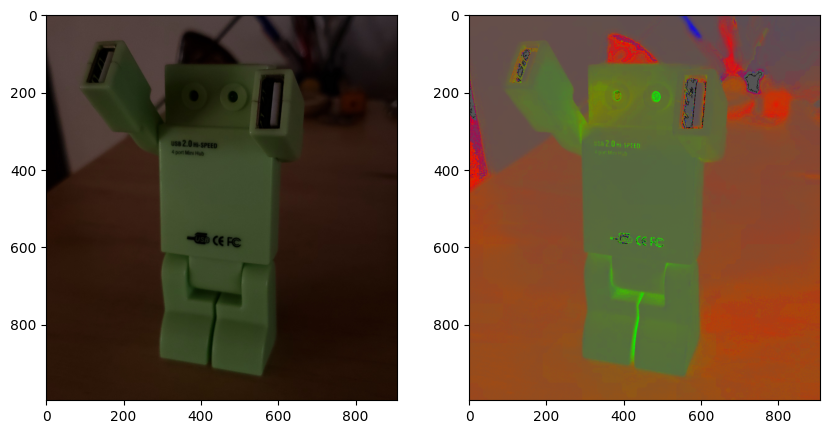

In [39]:
showTwoImages(img3, img3_crom)


<h1>White Patch</h1>

In [40]:
def imageToWhitePatch(imgRGB):
    im_r, im_g, im_b = cv.split(imgRGB)
    max_r = im_r.max()
    max_g = im_g.max()
    max_b = im_b.max()
    if max_r == 255 and max_g == 255 and max_b == 255:
        print('Fallo de white patch, usando percentil 99')
        max_r = np.percentile(im_r, 99)
        max_g = np.percentile(im_g, 99)
        max_b = np.percentile(im_b, 99)
    red = np.clip((255*(im_r/max_r)),0,255).astype("uint8")
    green = np.clip((255*(im_g/max_g)),0,255).astype("uint8")
    blue = np.clip((255*(im_b/max_b)),0,255).astype("uint8")
    return cv.merge([red, green, blue])


In [41]:
test_blue = cv.cvtColor(
    cv.imread("white_patch/test_blue.png",), cv.COLOR_BGR2RGB)
test_green = cv.cvtColor(
    cv.imread("white_patch/test_green.png",), cv.COLOR_BGR2RGB)
test_red = cv.cvtColor(
    cv.imread("white_patch/test_red.png",), cv.COLOR_BGR2RGB)
wp_blue = cv.cvtColor(cv.imread("white_patch/wp_blue.jpg",), cv.COLOR_BGR2RGB)
wp_green = cv.cvtColor(
    cv.imread("white_patch/wp_green.png",), cv.COLOR_BGR2RGB)
wp_green2 = cv.cvtColor(
    cv.imread("white_patch/wp_green2.jpg",), cv.COLOR_BGR2RGB)
wp_red = cv.cvtColor(cv.imread("white_patch/wp_red.png",), cv.COLOR_BGR2RGB)
wp_red2 = cv.cvtColor(cv.imread("white_patch/wp_red2.jpg",), cv.COLOR_BGR2RGB)


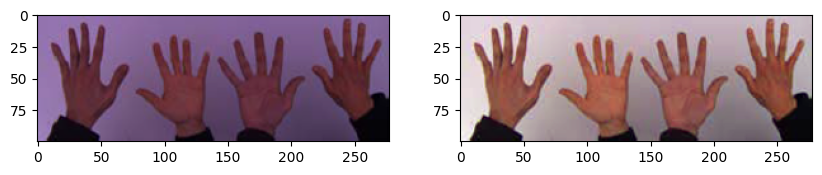

In [42]:
showTwoImages(test_blue, imageToWhitePatch(test_blue))


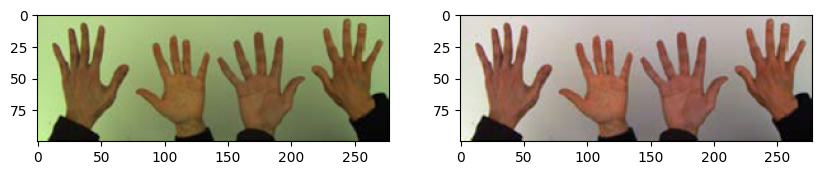

In [43]:
showTwoImages(test_green, imageToWhitePatch(test_green))


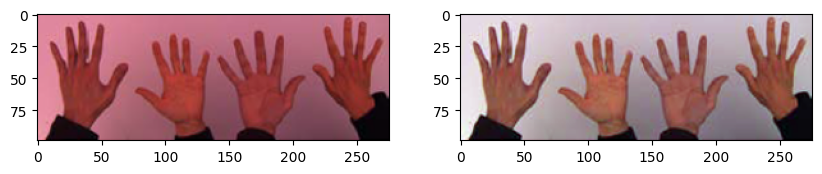

In [44]:
showTwoImages(test_red, imageToWhitePatch(test_red))


Fallo de white patch, usando percentil 99


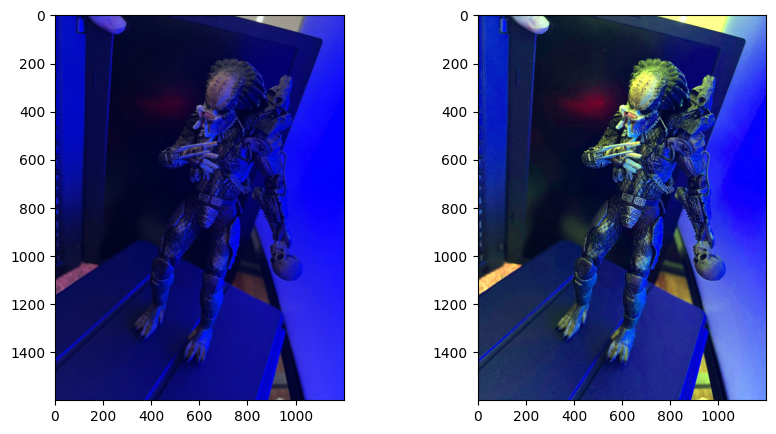

In [45]:
showTwoImages(wp_blue, imageToWhitePatch(wp_blue))


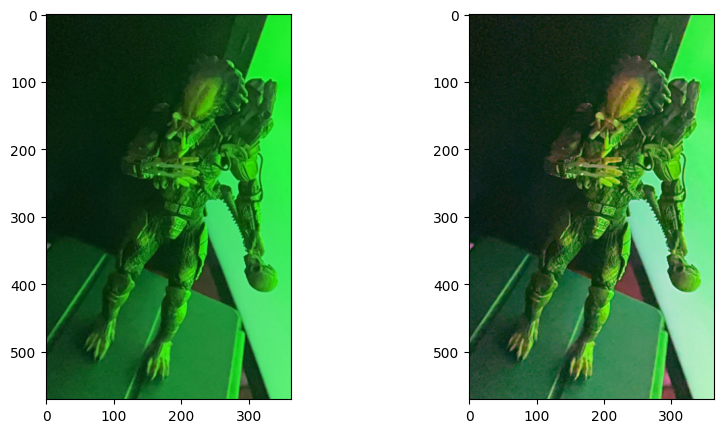

In [46]:
showTwoImages(wp_green, imageToWhitePatch(wp_green))

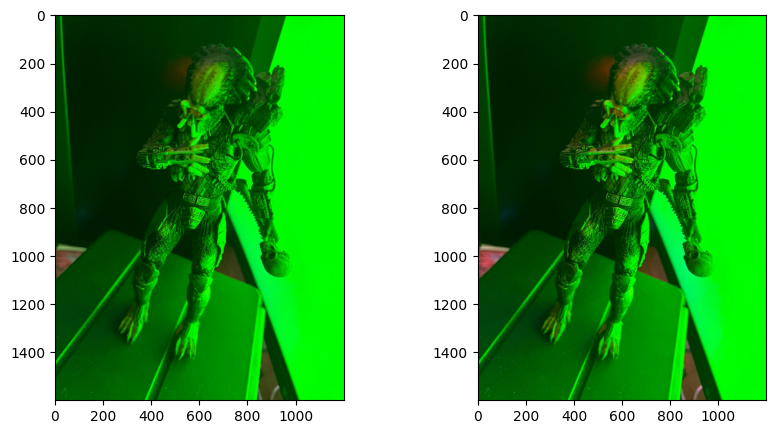

In [47]:
showTwoImages(wp_green2, imageToWhitePatch(wp_green2))

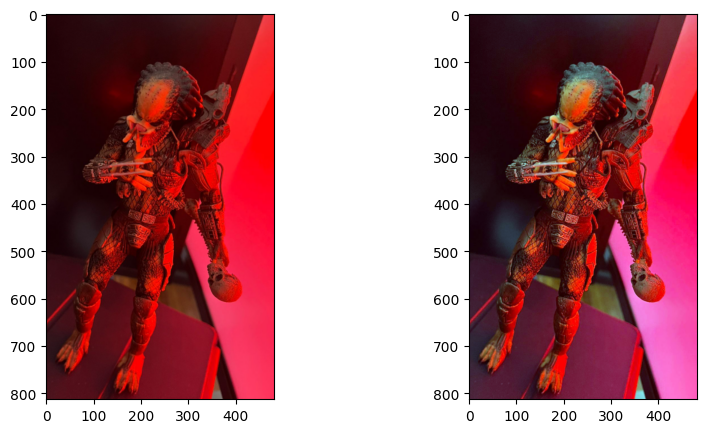

In [48]:
showTwoImages(wp_red, imageToWhitePatch(wp_red))

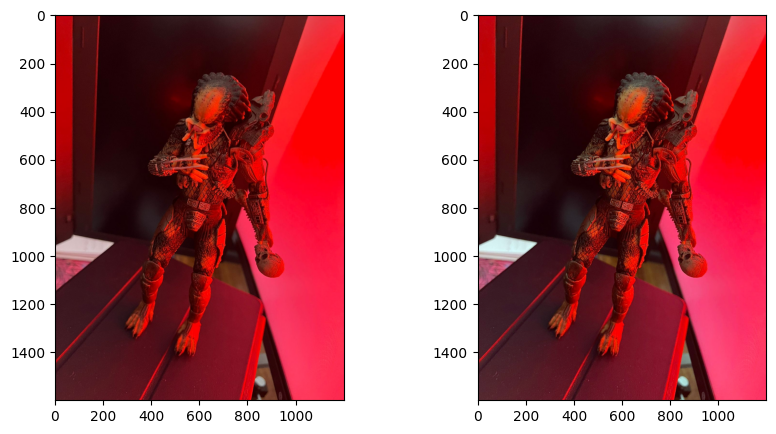

In [49]:
showTwoImages(wp_red2, imageToWhitePatch(wp_red2))

<h2>Parte 2</h2>

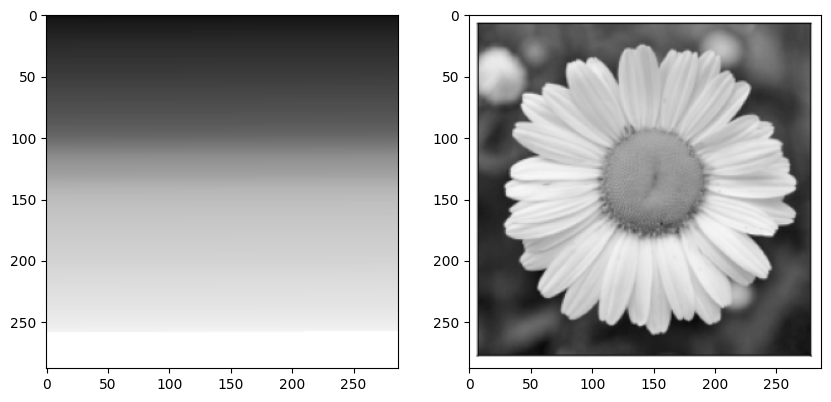

In [50]:
img1_tp = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2_tp = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1_tp, cmap='gray')
axs[1].imshow(img2_tp, cmap='gray')


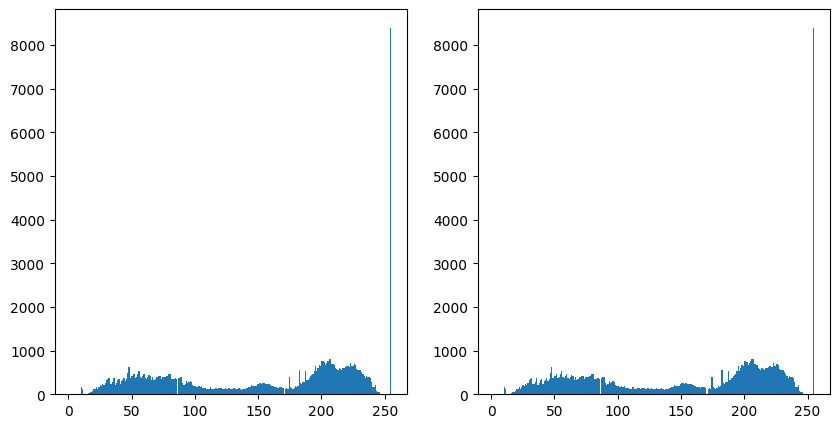

In [51]:
bins = 256 
flatten1 = img1_tp.flatten()
flatten2 = img2_tp.flatten()
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(flatten1,bins);
axs[1].hist(flatten2,bins);

<h3>Si bien las imagenes son completamente distintas, los histogramas son muy parecidos, hasta identicos.
Entonces concluimos que en general, que no es una buena idea usar como feature los histogramas, si bien tienen informacion de los pixeles de la imagen, se pierde la informacion espacial, es decir la informacion de la posicion de cada pixel en la imagen, solo importa cuantos pixeles toman que valor.</h3>

<h2>Segmentacion</h2>

In [52]:
img_color = cv.imread("segmentacion.png",)
imgRGB = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)


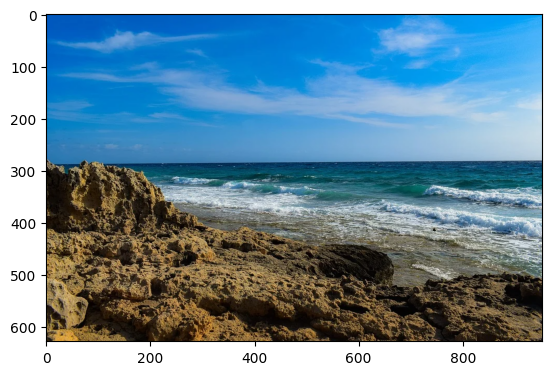

In [53]:
plt.imshow(imgRGB)
plt.show()


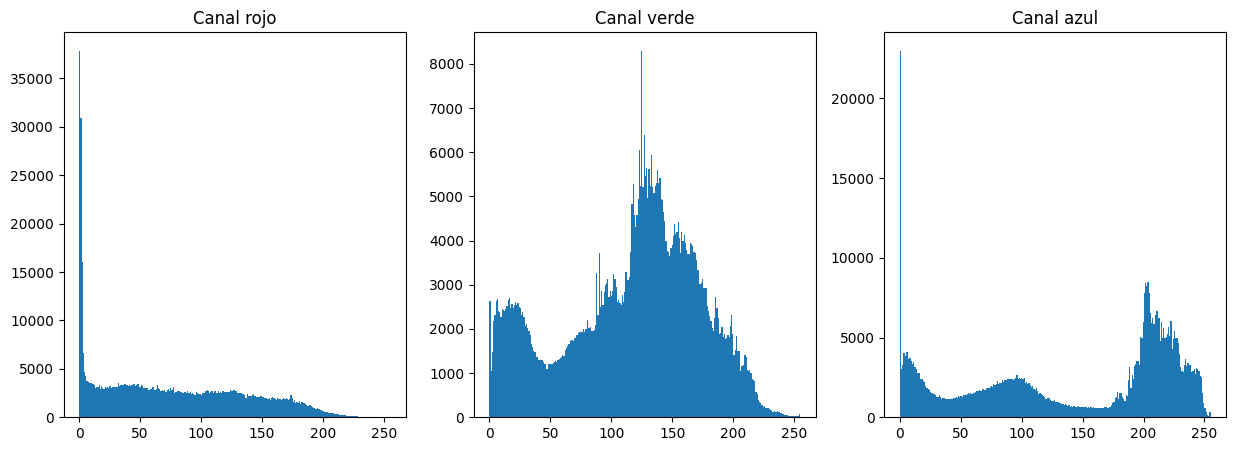

In [54]:
im_r, im_g, im_b = cv.split(imgRGB)
bins = 256
_, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].hist(im_r.ravel(), bins);
axs[0].set_title('Canal rojo');
axs[1].hist(im_g.ravel(), bins);
axs[1].set_title('Canal verde');
axs[2].hist(im_b.ravel(), bins);
axs[2].set_title('Canal azul');

<h3>Los valores de rojo parecen enforse cercanos a 0 en la imagen, mientras que en el canal verde y azul las distribuciones son mas equitativas. Se podria trabajar con diferentes muestras de la imagen y determinar los estadisticos en ciertas porciones. A continuacion vamos a analizar perfiles y diferentes secciones de la imagen para determinar la mejor segmentacion posible.</h3>

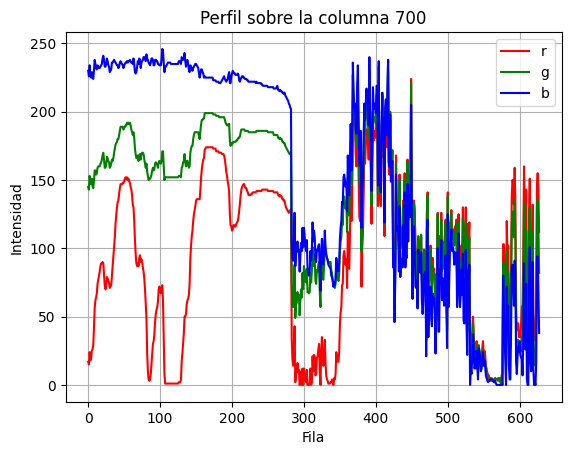

In [55]:
# Graficar los perfiles de intensidad de cada canal (rgb)
plt.figure()
idx_col = 700
perfil_color = imgRGB[:, idx_col]
plt.plot(perfil_color[:, 0], color='r', label='r')
plt.plot(perfil_color[:, 1], color='g', label='g')
plt.plot(perfil_color[:, 2], color='b', label='b')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.legend()
plt.show()


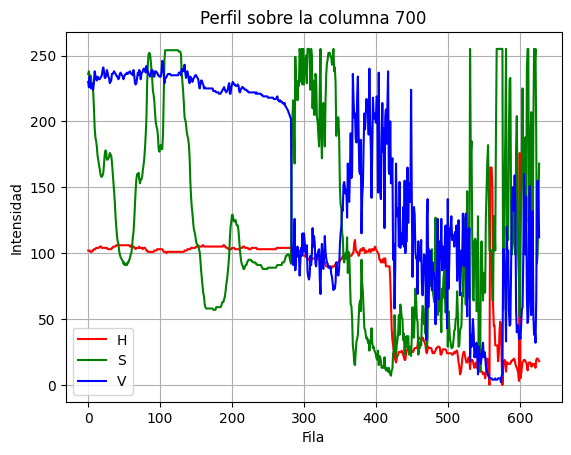

In [56]:
imgHSV = cv.cvtColor(imgRGB, cv.COLOR_RGB2HSV)
plt.figure()
idx_col = 700
perfil_color = imgHSV[:, idx_col]
plt.plot(perfil_color[:, 0], color='r', label='H')
plt.plot(perfil_color[:, 1], color='g', label='S')
plt.plot(perfil_color[:, 2], color='b', label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.legend()
plt.show()


<h3>Estrategia: en el mar y el cielo el hsv parace estar bastante constante, cambiando en la tierra, por lo que es util para separar tierra de cielo y mar. Luego cielo y mar lo podemos separar usando el canal b de la imagen RGB. En todos los casos usamos los percentiles y rangos intercuartilicos para definir outliers en ciertas zonas de la imagen</h3>

<h3> Tomamos una muestra de cielo y mar para calcular estadisticos. Utilizamos la mediana+-3IQR </h3>

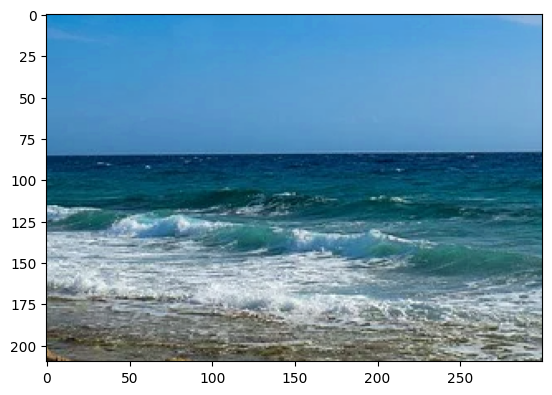

In [57]:
img_muestra_hsv = imgHSV[200:410, 300:600, :]
plt.imshow(cv.cvtColor(img_muestra_hsv, cv.COLOR_HSV2RGB))
plt.show()


123.0 81.0


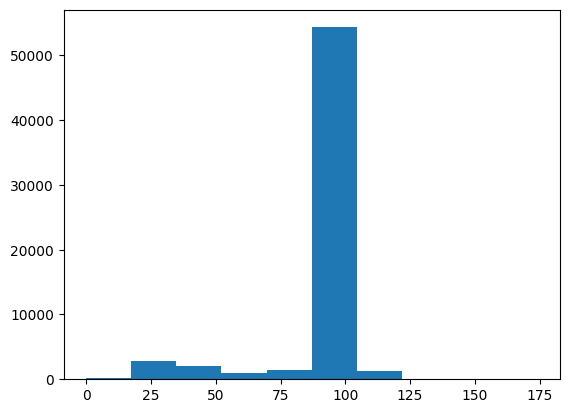

In [58]:
im_h, im_s, im_v = cv.split(img_muestra_hsv)
h_flatten = im_h.flatten()
q1 = np.percentile(h_flatten, 25)
q2 = np.percentile(h_flatten, 50)
q3 = np.percentile(h_flatten, 75)
iqr = q3 - q1
max = q2 + 3 * iqr
min = q2 - 3 * iqr
plt.hist(h_flatten)
print(max, min)


<h3> Logramos separar tierra de mar y cielo </h3>

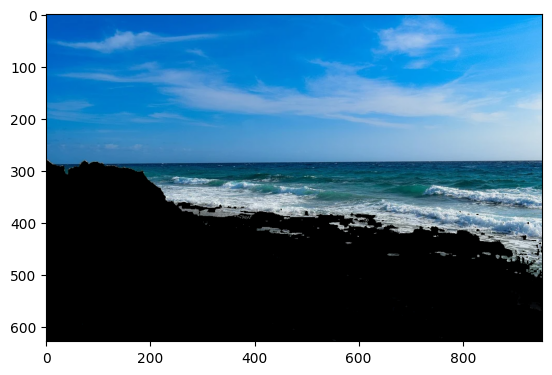

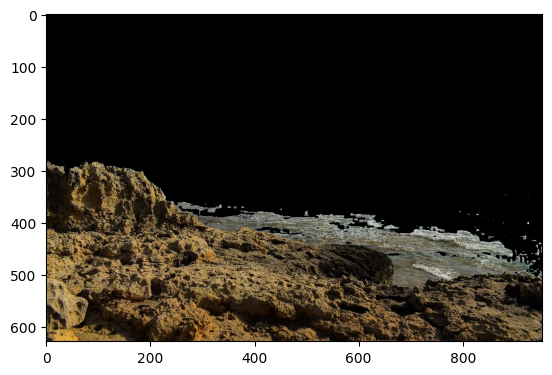

In [59]:
color_l = (min, 0, 0)
color_u = (max, 255, 255)
mask = cv.inRange(imgHSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=mask)
plt.imshow(img_segmentada)
plt.show()
imgPiedrasSegmentadaRGB = imgRGB - img_segmentada
plt.imshow(imgPiedrasSegmentadaRGB)
plt.show()


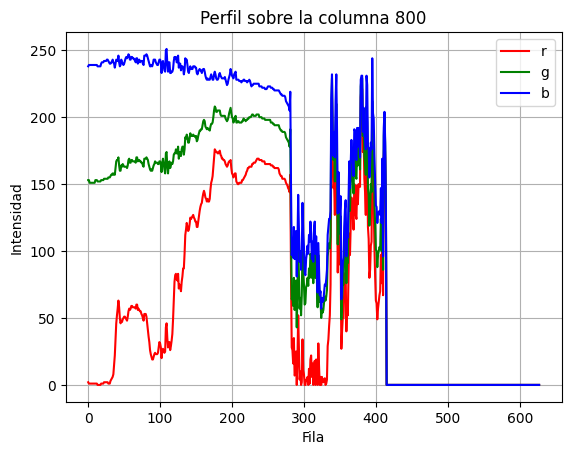

In [60]:
plt.figure()
idx_col = 800
perfil_color = img_segmentada[:, idx_col]
plt.plot(perfil_color[:, 0], color='r', label='r')
plt.plot(perfil_color[:, 1], color='g', label='g')
plt.plot(perfil_color[:, 2], color='b', label='b')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.legend()
plt.show()


<h3>Tomamos una muestra de cielo. Y estudiamos estadisticos mediana +- 3IQR</h3>

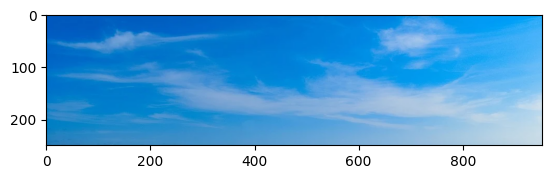

In [61]:
img_muestra_rgb = img_segmentada[0:250, :, :]
plt.imshow(img_muestra_rgb)
plt.show()


290.0 140.0


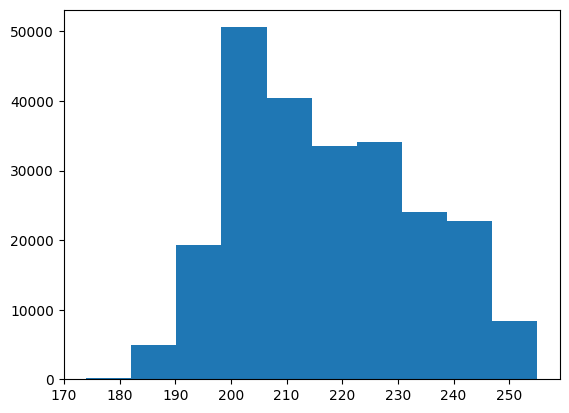

In [62]:
im_r, im_g, im_b = cv.split(img_muestra_rgb)
b_flatten = im_b.flatten()
q1 = np.percentile(b_flatten, 25)
q2 = np.percentile(b_flatten, 50)
q3 = np.percentile(b_flatten, 75)
iqr = q3 - q1
max = q2 + 3 * iqr
min = q2 - 3 * iqr
plt.hist(b_flatten)
print(max, min)


<h3> Finalmente separamos cielo de mar </h3>

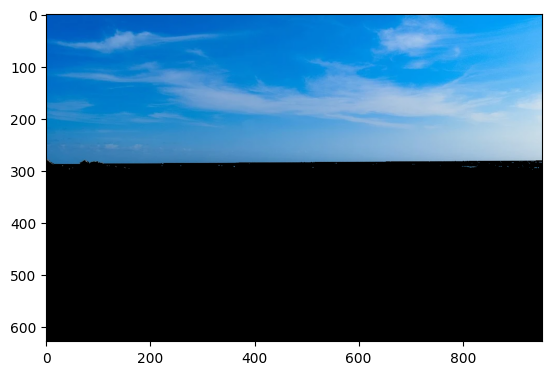

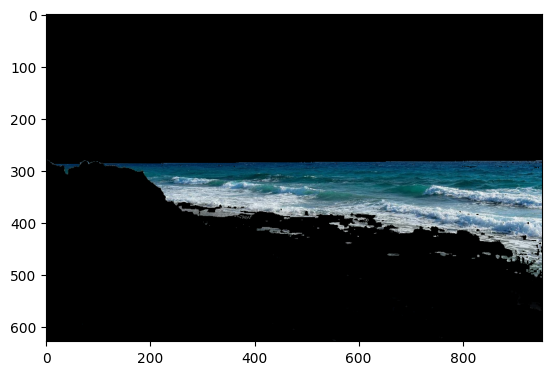

In [63]:
color_l = (0, 0, min)
color_u = (255, 255, max)
mask = cv.inRange(imgRGB, color_l,  color_u)
img_segmentada2 = cv.bitwise_and(img_segmentada, img_segmentada, mask=mask)
img_segmentada2[300:, :] = 0
imgCieloSegmentadaRGB = img_segmentada2
plt.imshow(img_segmentada2)
plt.show()
imgMarSegmentadaRGB = img_segmentada - img_segmentada2
plt.imshow(imgMarSegmentadaRGB)
plt.show()
